<a href="https://colab.research.google.com/github/avinanakarmi/CS634_FinalTermProject_ConfusionMatrix/blob/main/ComparingClassificationAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Preprocessing

In [3]:
!pip install ucimlrepo

In [19]:
from ucimlrepo import fetch_ucirepo

tic_tac_toe_endgame = fetch_ucirepo(id=101)

X = tic_tac_toe_endgame.data.features
y = tic_tac_toe_endgame.data.targets

df = pd.concat([X, y], axis=1)

df.describe()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


In [20]:
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [21]:
print("Dataframe shape", df.shape)
print()
print("Check type of data")
print(df.dtypes)
print()
print("Check for na")
print(df.isna().sum())

Dataframe shape (958, 10)

Check type of data
top-left-square         object
top-middle-square       object
top-right-square        object
middle-left-square      object
middle-middle-square    object
middle-right-square     object
bottom-left-square      object
bottom-middle-square    object
bottom-right-square     object
class                   object
dtype: object

Check for na
top-left-square         0
top-middle-square       0
top-right-square        0
middle-left-square      0
middle-middle-square    0
middle-right-square     0
bottom-left-square      0
bottom-middle-square    0
bottom-right-square     0
class                   0
dtype: int64


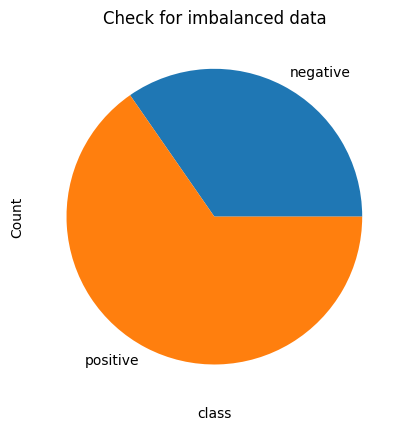

In [24]:
class_dist = df["class"].value_counts().sort_index()
plt.pie(class_dist.values, labels=class_dist.index)

plt.title("Check for imbalanced data")
plt.xlabel('class')
plt.ylabel('Count')

plt.show()

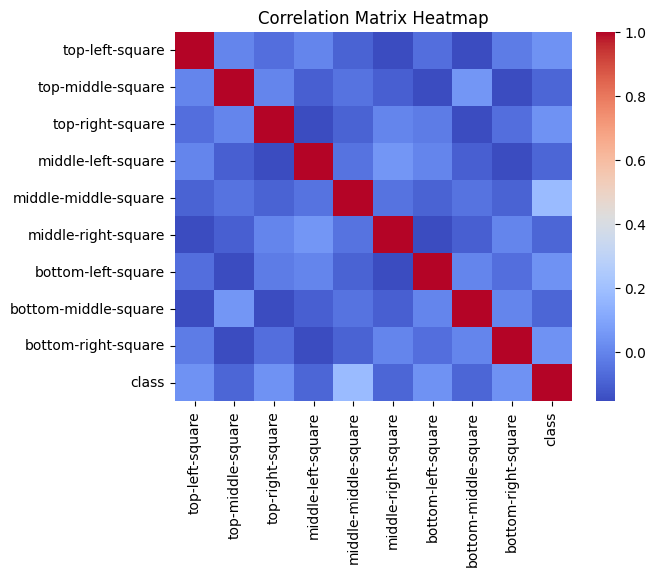

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

corr_matrix = df.corr(numeric_only = True)

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')

plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['class'])

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Feature       VIF
0       top-left-square  2.991897
1     top-middle-square  2.711507
2      top-right-square  2.991897
3    middle-left-square  2.711507
4  middle-middle-square  3.297655
5   middle-right-square  2.711507
6    bottom-left-square  2.991897
7  bottom-middle-square  2.711507
8   bottom-right-square  2.991897


# Model Selection


1.   **Decision Trees**:  Even though there is some multicollinearity (as shown by VIF values), Decision Trees are not affected by this because they split the data based on single features at each node.
2.   **Conv1D**: The Conv1D layer applies filters across the input features in a sliding window manner. This means that it can learn spatial patterns or relationships between adjacent squares (for example, detecting if 'X's or 'O's form a line in the tic-tac-toe grid).



# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

def predict_with_random_forest(X_train, y_train, X_test):
  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)
  return y_pred

# Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

def predict_with_decision_tree(X_train, y_train, X_test):
  dt = DecisionTreeClassifier()
  dt.fit(X_train, y_train)

  y_pred = dt.predict(X_test)
  return y_pred

# Conv1D

In [12]:
!pip install tensorflow

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


def predict_with_conv1d(X_train, y_train, X_test):
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=10, batch_size=32)
  y_pred = model.predict(X_test)
  return y_pred


# Util Functions

In [78]:
from sklearn.metrics import confusion_matrix
import statistics

def get_classification_outcomes(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return tn, fp, fn, tp

def visualize_model_performance(tn, fp, fn, tp ):
  print()
  print('Visualizing Model Performance')
  print(f"{'':<25} {'':<25} {'Actual':<25}")
  print(f"{'':<25} {'':<25} {'Positive':<25} {'Negative':<25}")
  print(f"{'Predicted':<25} {'Positive':<25} {tp:<25} {fp:<25}")
  print(f"{'':<25} {'Negative':<25} {fn:<25} {tn:<25}")
  print()

def safe_divide(numerator, denominator):
    if denominator == 0:
      return 0
    else:
      return numerator / denominator

def calculate_measures(y_true, y_pred):
  measures = {}
  tn, fp, fn, tp = get_classification_outcomes(y_true, y_pred)
  # visualize_model_performance(tn, fp, fn, tp )
  p = tp + fn
  n = tn + fp
  measures['tpr'] = safe_divide(tp, p)
  measures['tnr'] = safe_divide(tn, n)
  measures['precision'] = safe_divide(tp, (fp + tp))
  measures['npv'] = safe_divide(tn, (tn + fn))
  measures['fpr'] = safe_divide(fp, n)
  measures['fdr'] = safe_divide(fp, (fp + tp))
  measures['fnr'] = safe_divide(fn, n)
  measures['acc'] = safe_divide((tp + tn), (p + n))
  measures['f1'] = safe_divide((2 * measures['precision'] * measures['tpr']), (measures['precision'] + measures['tpr']))
  measures['err_rate'] = safe_divide((fp + fn), (p + n))
  measures['bacc'] = (measures['tpr'] + measures['tnr']) / 2
  measures['tss'] = (safe_divide(tp, (fn + tp))) - (safe_divide(fp, (fp + tn)))
  measures['hss'] = safe_divide(2 * (tp * tn - fp * fn), ((tp + fn) * (fn + tn) + (tp + fp) * (fp * tn)))
  bs = statistics.mean((y_true - y_pred) ** 2)
  y_mean = statistics.mean(y_test)
  measures['bss'] = safe_divide(bs, statistics.mean((y_test - y_mean) ** 2))

  return measures

# Train and test dataset preparation

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold



kf = KFold(n_splits=10)

for train_index, test_index in kf.split(df):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = df['class'].iloc[train_index], df['class'].iloc[test_index]

    rf_pred = predict_with_random_forest(X_train, y_train, X_test)
    calculate_measures(y_test, rf_pred)

    # dt_pred = predict_with_decision_tree(X_train, y_train, X_test)
    # print('dt', get_classification_outcomes(y_test, dt_pred))

    # conv1d_pred = predict_with_conv1d(X_train, y_train, X_test)
    # conv1d_pred = (conv1d_pred > 0.5).astype(int)
    # print('conv1d', get_classification_outcomes(y_test, conv1d_pred))


Visualizing Model Performance
                                                    Actual                   
                                                    Positive                  Negative                 
Predicted                 Positive                  20                        0                        
                          Negative                  76                        0                        

tpr                            0.20833333333333334      
tnr                            0                        
precision                      1.0                      
npv                            0.0                      
fpr                            0                        
fdr                            0.0                      
fnr                            0                        
acc                            0.20833333333333334      
f1                             0.3448275862068966       
err_rate                       0.7916666666666666       
bacc    